In [1]:
import warnings
warnings.filterwarnings('ignore')

python, numpy, pandas 날짜 타입 비교 및 정리

- datetime은 python 설치 시 기본적으로 내장된 라이브러리로, 날짜를 쓸 것인지, 시간을 쓸 것인지, 날짜시간을 합쳐쓸 것인지에 따라 클래스가 분화되어 있는 것이 특징. 예를들어 '2021-3-16'을 표시하고 싶으면 date 클래스를 사용하고, '2021-3-16 12:34:21'를 표시하고 싶으면 'datetime' 클래스를 사용합니다. 
- 반면 datetime64나 Timestamp는 각각 numpy, pandas 라이브러리에서 새로 정의한 날짜시간 클래스입니다. 이 둘은 numpy, pandas를 설치해야만 이용할 수 있고, 한 클래스로 날짜, 시간, 날짜시간을 모두 정의할 수 있는 것이 특징
- 날짜, 시간 타입은 일반적인 정수, 실수끼리 연산할 때와 달리 단위를 가지고 있는 점 때문에 시간의 차이를 저장하는 별도의 클래스가 있다는 특징. 이를 timedelta(타임델타)라고 하는데, 날짜, 시간은 특정 시점의 시각을 표시하는 용도이고(2021년 3월 16일), 타임델타는 기간 또는 시간 차이를 표시하는 용도(5일)

- https://ellun.tistory.com/320

<img src='dataset/날짜타입.jpg' STYLE='width:500px;'>

# 파이썬 날짜, 시간

## timestamp -> str

In [2]:
import time

t = time.time()
print(t, type(t))

s = str(time.time())
print(s, type(s))

1657181654.0899084 <class 'float'>
1657181654.0899084 <class 'str'>


```
Epoch 70년 1월 1일 부터 지난 초
```

## datetime -> str

In [3]:
from datetime import datetime
s = datetime.now()
print(s, type(s))
s1 = s.strftime('%Y-%m-%d %H: %M: %S')
print(s1, type(s1))

2022-07-07 17:14:14.174014 <class 'datetime.datetime'>
2022-07-07 17: 14: 14 <class 'str'>


## str -> datetime

In [4]:
from datetime import datetime
s = '2021-07-20 11:13:58'
print(s, type(s))
d = datetime.strptime(s, '%Y-%m-%d %H:%M:%S')
print(d, type(d))

2021-07-20 11:13:58 <class 'str'>
2021-07-20 11:13:58 <class 'datetime.datetime'>


## str -> datetime -> timestamp

In [45]:
s = '2021-07-20 11:13:58'

In [50]:
from datetime import datetime
dt_spt = datetime.strptime(s, '%Y-%m-%d %H:%M:%S')
dt_spt, type(dt_spt)

(datetime.datetime(2021, 7, 20, 11, 13, 58), datetime.datetime)

In [53]:
t_tuple = dt_spt.timetuple() #datetime.timetuple()  -> time.struct_time
t_tuple, type(t_tuple)

(time.struct_time(tm_year=2021, tm_mon=7, tm_mday=20, tm_hour=11, tm_min=13, tm_sec=58, tm_wday=1, tm_yday=201, tm_isdst=-1),
 time.struct_time)

In [54]:
timestamp = time.mktime(t_tuple)
print(timestamp, type(timestamp))

1626747238.0 <class 'float'>


## datetime -> timestamp

In [6]:
d = datetime.today()
print(d, type(d))

2022-07-07 17:14:14.481184 <class 'datetime.datetime'>


In [7]:
ts = time.mktime(d.timetuple())
print(ts, type(ts))

1657181654.0 <class 'float'>


## timestamp -> datetime

In [55]:
t = time.time()
print(t, type(t))
d = datetime.fromtimestamp(t)
print(d,type(d))

1657181989.308394 <class 'float'>
2022-07-07 17:19:49.308394 <class 'datetime.datetime'>


## (Done)과제 6/30 Thu (1)
- 현재시간을 timestamp로 블러와서 datetime, str로 타입변경한 후 다시 time stamp로 변경하세요
- 원하는 날짜+시간을 5개 str로 만든 후 datetime, timestamp 타입으로 변경하세요

### 현재시간을 timestamp로 블러와서 datetime, str로 타입변경한 후 다시 time stamp로 변경하세요

In [9]:
# 현재 시간을 timestamp로 불러오기

import time
t_now = time.time()
print(t_now, type(t_now))

1657181654.7736897 <class 'float'>


In [10]:
# timestamp를 datetime으로 변경

from datetime import datetime
d = datetime.fromtimestamp(t_now)
print(d, type(d))

2022-07-07 17:14:14.773690 <class 'datetime.datetime'>


In [56]:
#1년 ->초
year_sec=float(365*24*60*60)

In [57]:
datetime.fromtimestamp(year_sec)

datetime.datetime(1971, 1, 1, 9, 0)

In [11]:
# datetime을 다시 timestamp로 변경

t = d.timestamp()
print(t, type(t))

1657181654.77369 <class 'float'>


In [12]:
# timestamp를 str으로 변경

s = str(t_now)
print(s, type(s))


1657181654.7736897 <class 'str'>


In [13]:
# str을 다시 timestamp로 변경

t_f = float(s)
print(t_f, type(t_f))

1657181654.7736897 <class 'float'>


### 원하는 날짜+시간을 5개 str로 만든 후 datetime, timestamp 타입으로 변경하세요

In [14]:
s = '20210604122241'
print(s, type(s))
d = datetime.strptime(s, '%Y%m%d%H%M%S')
print(d, type(d))

20210604122241 <class 'str'>
2021-06-04 12:22:41 <class 'datetime.datetime'>


In [15]:
s = '2021/6/25 12:22:41'
print(s, type(s))
d = datetime.strptime(s, '%Y/%m/%d %H:%M:%S')
print(d, type(d))

2021/6/25 12:22:41 <class 'str'>
2021-06-25 12:22:41 <class 'datetime.datetime'>


In [16]:
s = '2011년 3월 25일 12시 22분 41초'
print(s, type(s))
d = datetime.strptime(s, '%Y년 %m월 %d일 %H시 %M분 %S초')
print(d, type(d))

2011년 3월 25일 12시 22분 41초 <class 'str'>
2011-03-25 12:22:41 <class 'datetime.datetime'>


In [17]:
s = '2065/4/1 12:59'
print(s, type(s))
d = datetime.strptime(s, '%Y/%m/%d %H:%M')
print(d, type(d))

2065/4/1 12:59 <class 'str'>
2065-04-01 12:59:00 <class 'datetime.datetime'>


In [18]:
s = '10/25/1998 1:3:5'
print(s, type(s))
d = datetime.strptime(s, '%m/%d/%Y %H:%M:%S')
print(d, type(d))

10/25/1998 1:3:5 <class 'str'>
1998-10-25 01:03:05 <class 'datetime.datetime'>


## practice

### 1년전 datetime 값

In [19]:
from datetime import timedelta
import time

datetime_now = datetime.now()
print(datetime_now)
delta_datetime = timedelta(days = -365)
print(delta_datetime)
datetime_now + delta_datetime

2022-07-07 17:14:15.748507
-365 days, 0:00:00


datetime.datetime(2021, 7, 7, 17, 14, 15, 748507)

### 두 날짜간의 일수 구하기

In [58]:
# parse : 문자열에서 뽑아내는거

In [59]:
since_timestamp = datetime.strptime('20180301', '%Y%m%d')
until_timestamp = datetime.strptime('20180331', '%Y%m%d')
print(since_timestamp)
print(until_timestamp)
result = until_timestamp - since_timestamp
print(result)

2018-03-01 00:00:00
2018-03-31 00:00:00
30 days, 0:00:00


### 특정요일 구하기

In [62]:
import datetime
def get_yoil(y, m, d):
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    return days[datetime.date(y,m,d).weekday()]
get_yoil(2022,7, 8)

'Fri'

# 판다스 to_datetime

 - 판다스에서는 파이썬의 datetime을 timestamp라고 함

In [63]:
import pandas as pd
pd.to_datetime(1656550158.7456548, unit='s' )

Timestamp('2022-06-30 00:49:18.745654784')

In [65]:
t =  time.time()
t

1657182327.65305

In [66]:
date = pd.Timestamp(t, unit = 's',  tz = 'Asia/Seoul')
print(date, type(date))

2022-07-07 17:25:27.653049946+09:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


# Dataframe에

In [78]:
df = pd.read_csv('dataset/stock-data.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [80]:
df['New_Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   New_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


In [81]:
df.drop('Date', axis = 1, inplace = True)
df['year'] = df['New_Date'].dt.year
df['month'] = df['New_Date'].dt.month
df['day'] = df['New_Date'].dt.day
df.head()

,Close,Start,High,Low,Volume,New_Date,year,month,day
0,10100,10850,10900,10000,137977,2018-07-02,2018,7,2
1,10700,10550,10900,9990,170253,2018-06-29,2018,6,29
2,10400,10900,10950,10150,155769,2018-06-28,2018,6,28
3,10900,10800,11050,10500,133548,2018-06-27,2018,6,27
4,10800,10900,11000,10700,63039,2018-06-26,2018,6,26


- Series.dt
- Accessor object for datetimelike properties of the Series values.

## index를 설정

In [82]:
df1 = df.copy()
df1.set_index('New_Date', inplace = True)
df1.head()

,Close,Start,High,Low,Volume,year,month,day
New_Date,,,,,,,,
2018-07-02,10100,10850,10900,10000,137977,2018,7,2
2018-06-29,10700,10550,10900,9990,170253,2018,6,29
2018-06-28,10400,10900,10950,10150,155769,2018,6,28
2018-06-27,10900,10800,11050,10500,133548,2018,6,27
2018-06-26,10800,10900,11000,10700,63039,2018,6,26


In [83]:
df1.index

DatetimeIndex(['2018-07-02', '2018-06-29', '2018-06-28', '2018-06-27',
               '2018-06-26', '2018-06-25', '2018-06-22', '2018-06-21',
               '2018-06-20', '2018-06-19', '2018-06-18', '2018-06-15',
               '2018-06-14', '2018-06-12', '2018-06-11', '2018-06-08',
               '2018-06-07', '2018-06-05', '2018-06-04', '2018-06-01'],
              dtype='datetime64[ns]', name='New_Date', freq=None)

In [84]:
df1_ym = df1.loc['2018-07', 'Start' : 'Low']
df1_ym

,Start,High,Low
New_Date,,,
2018-07-02,10850,10900,10000


## index를 생성

In [85]:
what = pd.date_range(start = '2020-10-01', end = '2020-10-20', periods=5) #period 는 갯수
print(what, type(what))

DatetimeIndex(['2020-10-01 00:00:00', '2020-10-05 18:00:00',
               '2020-10-10 12:00:00', '2020-10-15 06:00:00',
               '2020-10-20 00:00:00'],
              dtype='datetime64[ns]', freq=None) <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [86]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
print(dates)

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [87]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

# 뭔가를 보충

In [88]:
%pwd

'C:\\cakd7\\m2_분석라이브러리활용\\01_Pandas'

In [89]:
import pandas as pd
df = pd.read_csv('./dataset/stock-data.csv')# ./헤도 되고 생략도 되고
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [90]:
df['New_Date'] = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   New_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


In [91]:
# pandas.to_datetime( args)
# args  : int, float, str, datetime, list, tuple, 1-d array, Series, DataFrame/dict-like

In [94]:
df1 = df.copy()
df1.set_index('New_Date', inplace=True)
df1.drop('Date', axis=1, inplace=True) # columns 를 drop할때는 꼭 축을 명시
df1.head()

,Close,Start,High,Low,Volume
New_Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


## index를 리셋

In [95]:
df1 = df1.reset_index()
df1.head()

,New_Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [96]:
df1['Month'] = df1.New_Date.dt.month
df1.head()

,New_Date,Close,Start,High,Low,Volume,Month
0,2018-07-02,10100,10850,10900,10000,137977,7
1,2018-06-29,10700,10550,10900,9990,170253,6
2,2018-06-28,10400,10900,10950,10150,155769,6
3,2018-06-27,10900,10800,11050,10500,133548,6
4,2018-06-26,10800,10900,11000,10700,63039,6


In [97]:
df1 = df1.set_index('Month')
df1.head()

,New_Date,Close,Start,High,Low,Volume
Month,,,,,,
7,2018-07-02,10100,10850,10900,10000,137977
6,2018-06-29,10700,10550,10900,9990,170253
6,2018-06-28,10400,10900,10950,10150,155769
6,2018-06-27,10900,10800,11050,10500,133548
6,2018-06-26,10800,10900,11000,10700,63039


In [98]:
df1 = df1.reset_index()
df1.head()

,Month,New_Date,Close,Start,High,Low,Volume
0,7,2018-07-02,10100,10850,10900,10000,137977
1,6,2018-06-29,10700,10550,10900,9990,170253
2,6,2018-06-28,10400,10900,10950,10150,155769
3,6,2018-06-27,10900,10800,11050,10500,133548
4,6,2018-06-26,10800,10900,11000,10700,63039


<AxesSubplot:>

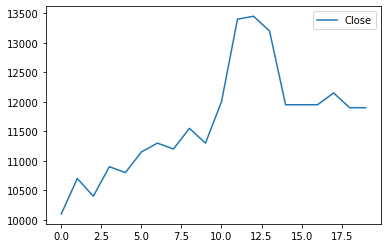

In [99]:
df_g = df1[['Close']]
df_g.plot()

<AxesSubplot:>

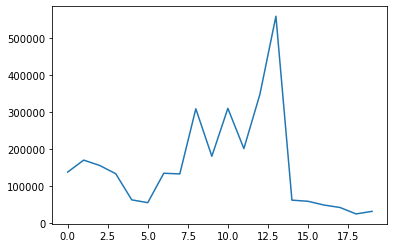

In [100]:
df1.Volume.plot()